#  Predict Salary of an Employee using Year_of_experience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset
#refer: codebasic youtube channel
data=pd.read_csv(r"C:\Users\Gunand\Downloads\9401_13260_bundle_archive\Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0.5, 1.0, 'Years vs Salary')

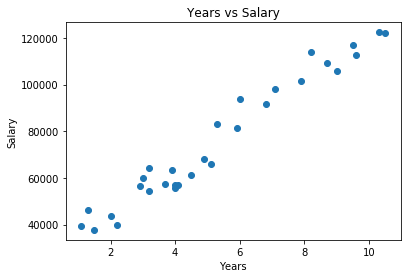

In [4]:
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Years vs Salary")

In [5]:
x = np.array(data.YearsExperience.values)
y = np.array(data.Salary.values)

In [6]:
#predicted y value
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in x:
        y_lst.append(int(weight*i+intercept))
    return np.array(y_lst)

#loss function
def loss(y,y_predicted):
    n=len(y)
    s=sum((y_predicted-y)**2)
    return int((1/2*n) * s)

#differentiate loss function w.r.t "w"
def dldw(x,y,y_predicted):
    n=len(y)
    s=sum(x*(y_predicted-y))
    return (1/n)*s

#differentiate loss function w.r.t "b"
def dldb(y,y_predicted):
    n=len(y)
    s=sum(y_predicted-y)
    
    return (1/n) * s
   
        
        

def gradient_descent(x,y):
    weight=np.random.rand() #randomly initialise weight
    intercept=np.random.rand()
    epoch = 400 #number of passes of the entire training dataset
    n = len(x)
    learning_rate = 0.03 #step size
    linear_loss=[]

    for i in range(epoch):
        
        y_predicted = predicted_y(weight,x,intercept)
        
        weight = weight - (learning_rate *dldw(x,y,y_predicted) ) #updating weight
        
        intercept = intercept - (learning_rate * dldb(y,y_predicted)) #updating intercept
        linear_loss.append(loss(y,y_predicted)) #append loss in each iteration
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return int(weight),int(intercept)
    

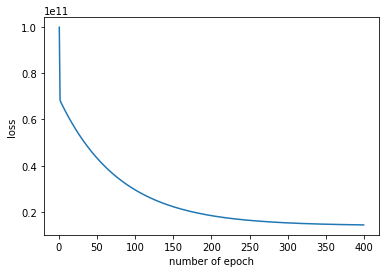

In [7]:
weight,intercept=gradient_descent(x,y)


In [8]:
weight

9727

In [9]:
intercept

23922

# Predict your Salary

In [10]:
def predict_salary(years_of_experience):
    return int(weight*years_of_experience+intercept)

In [11]:
#4.8 years experience
predict_salary(4.8)

70611

In [12]:
#2 years salary
predict_salary(2)

43376